In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import numpy as np

In [2]:
tf.__version__

'1.5.0'

In [3]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128      

In [4]:
# Simple CNN

In [5]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("./data/MNIST", one_hot=True)

Extracting ./data/MNIST\train-images-idx3-ubyte.gz
Extracting ./data/MNIST\train-labels-idx1-ubyte.gz
Extracting ./data/MNIST\t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST\t10k-labels-idx1-ubyte.gz


In [7]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))

Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


In [8]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes = 10
num_channels = 1
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [9]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace =0.3) 
    for i, ax in enumerate(axes.flat): 
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

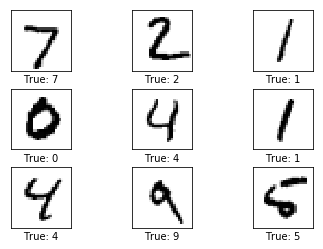

In [10]:
# Get the first images from the test-set.
images = data.test.images[:9] 
# Get the true classes for those images.
cls_true = data.test.cls[:9]  
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [11]:

#     Placeholder variables used for inputting data to the graph.
#     Variables that are going to be optimized so as to make the convolutional network perform better.
#     The mathematical formulas for the convolutional network.
#     A cost measure that can be used to guide the optimization of the variables.
#     An optimization method which updates the variables.


In [12]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [23]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [24]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters, use_pooling=True):
    shape = [filter_size, filter_size, num_input_channels, num_filters]
    
    weights = new_weights(shape=shape)
    biases = new_biases(length=num_filters)
    
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1,1,1,1],
                         padding='SAME')
    layer += biases
    
    if use_pooling:
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1,2,2,1],
                               strides=[1,2,2,1],
                               padding='SAME')
    
    layer = tf.nn.relu(layer)
    
    return layer, weights

In [25]:
def flatten_layer(layer):
    layer_shape = layer.get_shape()
    print(layer_shape)
    
    num_features = layer_shape[1:4].num_elements()
    
    layer_flat = tf.reshape(layer, [-1, num_features])
    
    return layer_flat, num_features


In [26]:
def new_fc_layer(input, num_inputs, num_outputs, use_relu=True):
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)
    
    layer = tf.matmul(input, weights) + biases
    
    if use_relu:
        layer = tf.nn.relu(layer)
    
    return layer

In [17]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

In [18]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

In [19]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [20]:
y_true_cls = tf.argmax(y_true, axis=1)

In [21]:
# Layer 1

In [27]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

In [29]:
layer_conv1

<tf.Tensor 'Relu:0' shape=(?, 14, 14, 16) dtype=float32>

In [30]:
# Layer 2

In [32]:
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True
                  )

In [34]:
layer_conv2

<tf.Tensor 'Relu_2:0' shape=(?, 7, 7, 36) dtype=float32>

In [36]:
layer_flat, num_features = flatten_layer(layer_conv2)

(?, 7, 7, 36)


In [38]:
layer_flat

<tf.Tensor 'Reshape_2:0' shape=(?, 1764) dtype=float32>

In [39]:
num_features

1764

In [41]:
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

In [43]:
layer_fc1

<tf.Tensor 'Relu_4:0' shape=(?, 128) dtype=float32>

In [44]:
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

In [45]:
layer_fc2

<tf.Tensor 'add_6:0' shape=(?, 10) dtype=float32>

In [46]:
y_pred = tf.nn.softmax(layer_fc2)

In [47]:
y_pred_cls = tf.argmax(y_pred, axis=1)

In [48]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [50]:
cost = tf.reduce_mean(cross_entropy)

In [51]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [52]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [53]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [54]:
# Run Session

In [57]:
session = tf.Session()

In [58]:
session.run(tf.global_variables_initializer())

In [59]:
train_batch_size = 64

In [90]:
total_iterations = 0

def optimize(num_iterations):
    global total_iterations
    
    start_time = time.time()
    
    for i in range(total_iterations, total_iterations+num_iterations):
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)
        
        feed_dict_train = {
            x: x_batch,
            y_true: y_true_batch
        }
        
        session.run(optimizer, feed_dict=feed_dict_train)
        
        if i%100 ==0:
            acc = session.run(accuracy, feed_dict=feed_dict_train)
            
            msg = 'Optimization Iteration: {0:>6}, Training Accurach: {1:>6.1%}'
            print(msg.format(i+1,acc))
            
        total_iterations += num_iterations
        
        end_time = time.time()
        
        time_dif = end_time - start_time
    print('Time usage: '+ str(timedelta(seconds=int(round(time_dif)))))

In [87]:
def plot_example_errors(cls_pred, correct):
    incorrect = (correct == False)
    
    images = data.test.images[incorrect]
    cls_pred = cls_pred[incorrect]
    
    cls_true = data.test.cls[incorrect]
    
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [86]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [70]:
# Split the test-set into smaller batches of this size.
test_batch_size = 256

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(data.test.labels)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = data.test.images[i:j, :]

        # Get the associated labels.
        labels = data.test.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = data.test.cls

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

In [71]:
print_test_accuracy()

Accuracy on Test-Set: 15.7% (1574 / 10000)


In [79]:
optimize(num_iterations=1)

Time usage: 0:00:00


In [80]:
print_test_accuracy()

Accuracy on Test-Set: 15.8% (1583 / 10000)


In [81]:
optimize(num_iterations=99) # We already performed 1 iteration above.

Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03


Accuracy on Test-Set: 69.0% (6898 / 10000)
Example errors:


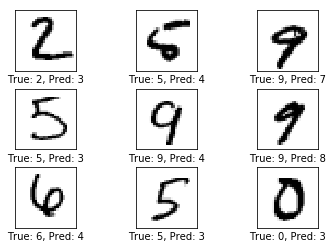

In [88]:
print_test_accuracy(show_example_errors=True)

In [89]:
optimize(num_iterations=900) # We performed 100 iterations above.

Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:00
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:01
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:02
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03
Time usage: 0:00:03


Time usage: 0:00:23
Time usage: 0:00:23
Time usage: 0:00:23
Time usage: 0:00:23
Time usage: 0:00:23
Time usage: 0:00:23
Time usage: 0:00:23
Time usage: 0:00:23
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:24
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:25
Time usage: 0:00:26
Time usage: 0:00:26
Time usage: 0:00:26
Time usage: 0:00:26
Time usage: 0:00:26
Time usage: 0:00:26
Time usage: 0:00:26


Time usage: 0:00:46
Time usage: 0:00:46
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:47
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:48
Time usage: 0:00:49
Time usage: 0:00:49
Time usage: 0:00:49
Time usage: 0:00:49
Time usage: 0:00:49
Time usage: 0:00:49
Time usage: 0:00:49
Time usage: 0:00:49
Time usage: 0:00:49
Time usage: 0:00:49
Time usage: 0:00:49
Time usage: 0:00:49
Time usage: 0:00:49


Accuracy on Test-Set: 93.6% (9359 / 10000)
Example errors:


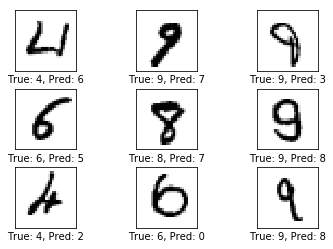

In [91]:
print_test_accuracy(show_example_errors=True)

In [92]:
optimize(num_iterations=9000) # We performed 1000 iterations above.

Optimization Iteration:      1, Training Accurach:  96.9%
Optimization Iteration:    101, Training Accurach:  93.8%
Optimization Iteration:    201, Training Accurach:  92.2%
Optimization Iteration:    301, Training Accurach:  92.2%
Optimization Iteration:    401, Training Accurach:  90.6%
Optimization Iteration:    501, Training Accurach:  92.2%
Optimization Iteration:    601, Training Accurach:  92.2%
Optimization Iteration:    701, Training Accurach:  98.4%
Optimization Iteration:    801, Training Accurach:  95.3%
Optimization Iteration:    901, Training Accurach:  93.8%
Optimization Iteration:   1001, Training Accurach:  95.3%
Optimization Iteration:   1101, Training Accurach:  92.2%
Optimization Iteration:   1201, Training Accurach:  96.9%
Optimization Iteration:   1301, Training Accurach:  98.4%
Optimization Iteration:   1401, Training Accurach:  98.4%


KeyboardInterrupt: 

Accuracy on Test-Set: 96.6% (9664 / 10000)
Example errors:


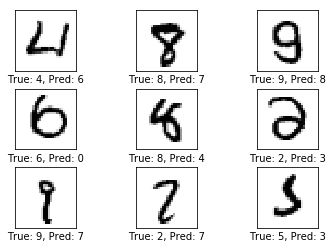

Confusion Matrix:
[[ 966    0    1    0    0    1    6    3    3    0]
 [   0 1116    4    1    0    0    3    0   11    0]
 [   7    2  982    9    5    1    1   11   14    0]
 [   0    0    5  980    0    2    0   12   11    0]
 [   1    2    2    0  946    0    5    2    2   22]
 [   3    2    1   17    0  852    6    1    7    3]
 [   8    3    1    1    5    1  937    0    2    0]
 [   1    5   15    2    1    0    0  989    1   14]
 [   6    1    2    8    3    0    5    9  934    6]
 [   7    6    1    4   10    3    0    9    7  962]]


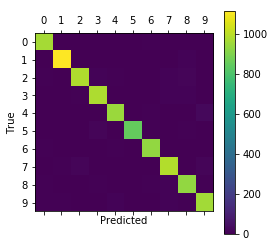

In [93]:
print_test_accuracy(show_example_errors=True,
                    show_confusion_matrix=True)